In [2]:
#################
# Load Packages #
#################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
import generateGraphs

%matplotlib inline

In [3]:
#################
#  Description  #
#################
#Analyze donations table and develop basic forecast
#Unfortunately didn't have time to study frequency of donors by ID

In [4]:
########################
#  Data Normalization  #
#  And Exploration     #
########################

donationData = pd.read_csv("donations_anonymized.csv", dtype={'zip':str})
donationData.drop(['target'], axis=1, inplace=True) #redundant column
donationData = donationData.iloc[:2189] #get everything EXCEPT the last row which has a bad date
donationData = donationData[donationData['campaign'] != 'In-Kind']
donationData = donationData[donationData['campaign'] != 'In/Out']

donationData = donationData[donationData['amount'] != donationData['amount'].max()] #remove big outlier, note that this is a "Misc" campaign

donationData['date'] = pd.to_datetime(donationData['date'])
donationData['date'].max()

donationIndividualData = donationData[donationData['organisation'] == 'N']
donationIndividualData['year'] = donationIndividualData['date'].dt.year
donationIndividualData.groupby(['year']).sum()['amount']

donationData['campaign'].unique()

<ipython-input-4-435618db4db8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donationIndividualData['year'] = donationIndividualData['date'].dt.year


array(['Clients', 'Fall Towns', 'Misc', 'Board', 'Corporatio', 'Mem-hon',
       'Foundation', 'Emerg fund', 'Escort Dri', 'D.Young Fu', 'Sprg Evt',
       'Church', 'CAC', 'AMCRC', 'Newsletter', 'Special Pr', 'Grants',
       'United Way'], dtype=object)

In [8]:
#old code that looks at unique values in relevant columns
"""for columnName in donationData.columns:
    if columnName in ["anon_donor_id", "date", "amount"]:
        pass 
    else:
        print(columnName)
        print(donationData[columnName].unique())
        print("\n")
print(donationData['organisation'].unique())"""

'for columnName in donationData.columns:\n    if columnName in ["anon_donor_id", "date", "amount"]:\n        pass \n    else:\n        print(columnName)\n        print(donationData[columnName].unique())\n        print("\n")\nprint(donationData[\'organisation\'].unique())'

In [ ]:
#look at top donors - unfortunately not much was done with this
"""highestClients = donationData.groupby(['anon_donor_id']).sum()['amount']
print(highestClients.sort_values(ascending = False)[:20])
print(highestClients.describe())"""

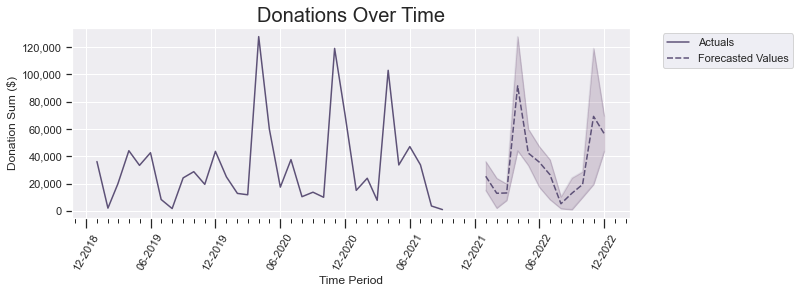

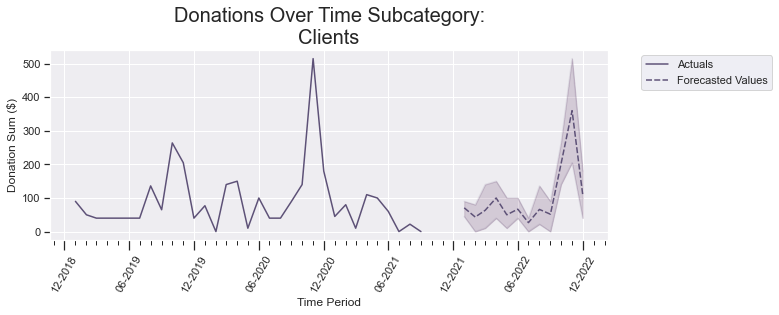

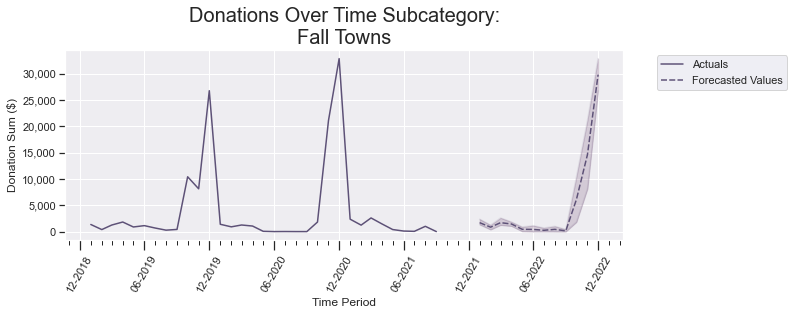

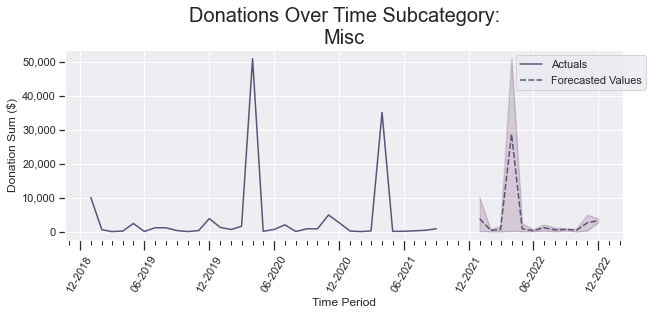

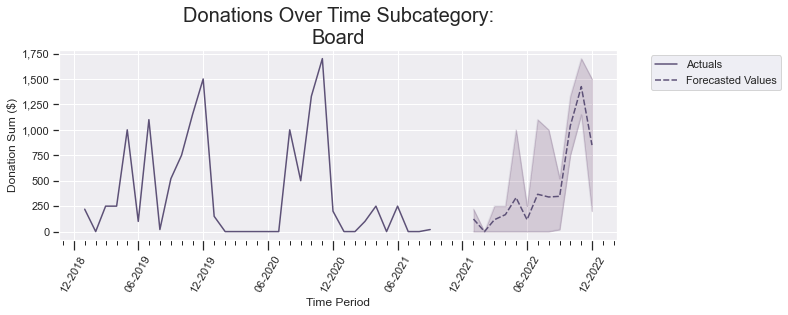

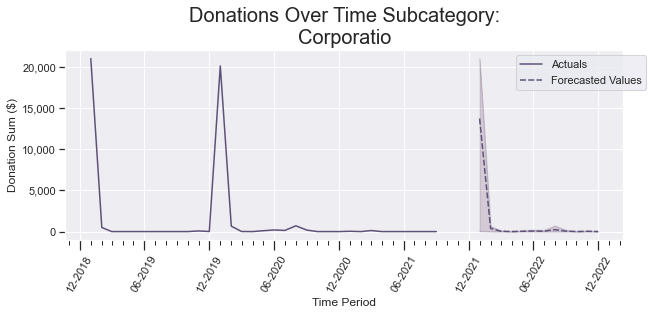

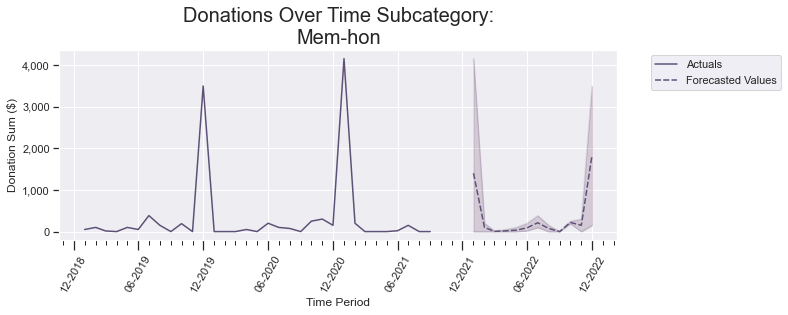

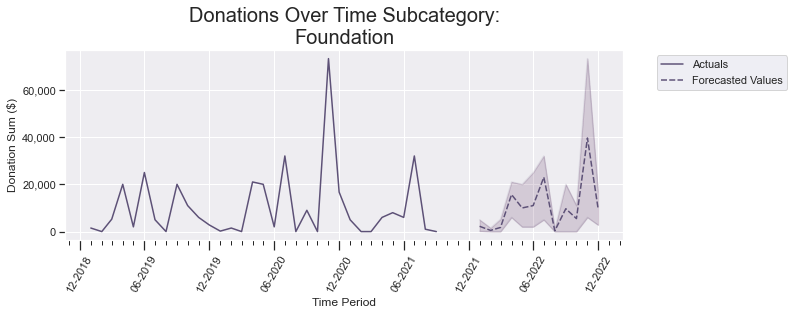

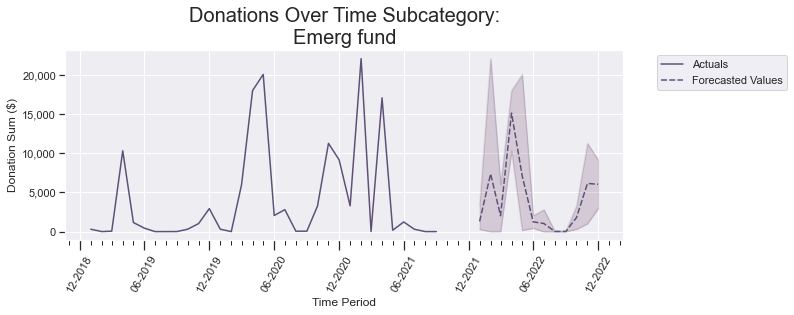

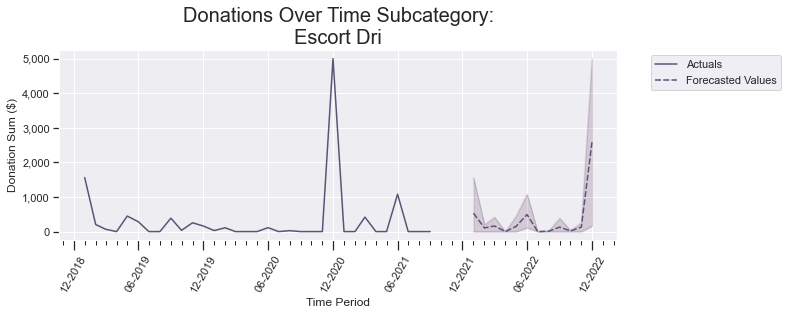

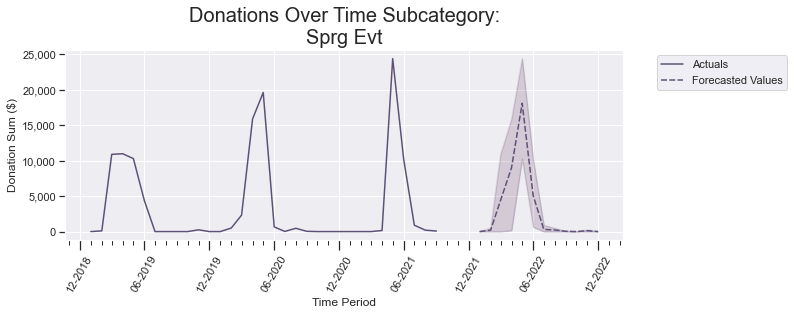

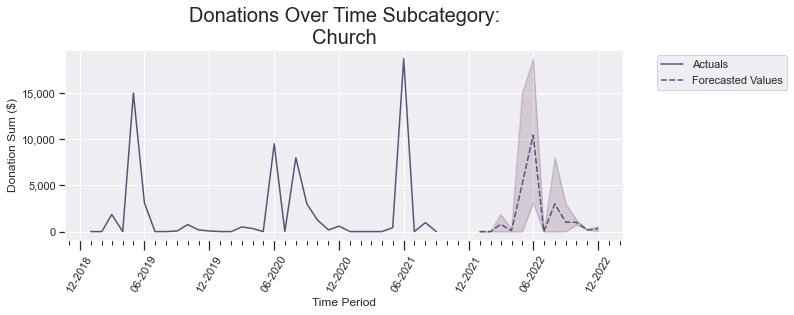

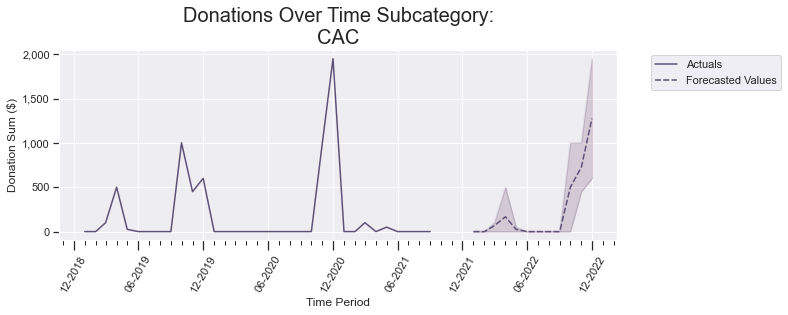

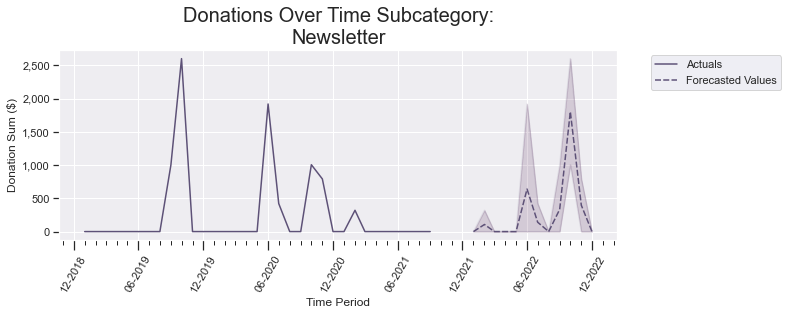

In [3]:
#################
# Data Analysis #
################

#form list of subcategories for graphs
listOfCategories = ['Clients', 'Fall Towns', 'Misc', 'Board', 'Corporatio', 'Mem-hon',
       'Foundation', 'Emerg fund', 'Escort Dri', 'Sprg Evt',
       'Church', 'CAC', 'Newsletter']

generateGraphs.generateGraphSet(dataFrameNameForTitle = 'Donations', df = donationData, dateColumn='date',specialColumnForCategory ='campaign', 
                                listOfCategories= listOfCategories, columnForAnalysis='amount', 
                                yAxisNameForGraph= 'Donation Sum ($)', isSummed='Yes')